# You can find the dataset at
https://www.kaggle.com/competitions/titanic/overview

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [1]:
train_df = pd.read_csv('train.csv')

NameError: name 'pd' is not defined

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
### Drop cabin and passenger_id column since they are not important
train_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis = 1, inplace=True)

In [7]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
### Let's fix missing data problem in training and test set

#Finding the mean of Age column
mean_value = train_df['Age'].mean()
# Replace missing values with mean
train_df['Age'].fillna(value=mean_value, inplace=True)



In [9]:
### Cabin has 2 missing records in training set, so we will just drop those 2 rows
train_df = train_df.dropna(axis=0, how='any')

In [10]:
### Lets check for any duplicate data
train_df.duplicated().sum()

111

In [11]:
train_df.drop_duplicates(inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  778 non-null    int64  
 1   Pclass    778 non-null    int64  
 2   Sex       778 non-null    object 
 3   Age       778 non-null    float64
 4   SibSp     778 non-null    int64  
 5   Parch     778 non-null    int64  
 6   Fare      778 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.7+ KB


In [13]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,29.745666,0.526992,0.419023,34.712987
std,0.492388,0.853206,13.674550,0.988956,0.839346,52.280326
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.250000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariant Plots

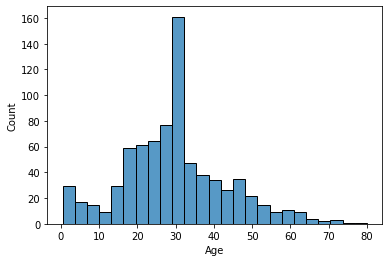

In [14]:
### Lets check for outliers in age, and fare columns
sns.histplot(data=train_df, x="Age");

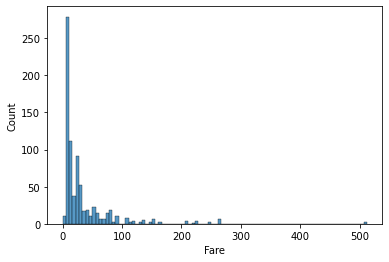

In [15]:
sns.histplot(data=train_df, x="Fare");

In [16]:
### Drop age > 50 and fare > 100

indexNames = train_df[ train_df['Age'] >= 50 ].index
train_df.drop(indexNames , inplace=True)

indexNames = train_df[ train_df['Fare'] >= 100 ].index
train_df.drop(indexNames , inplace=True)

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

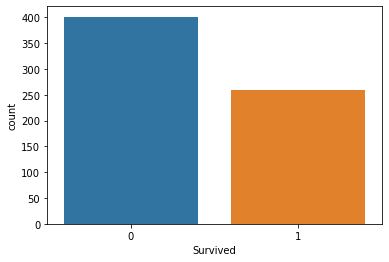

In [18]:
sns.countplot(x=train_df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

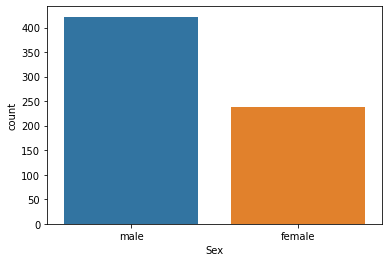

In [19]:
sns.countplot(x=train_df['Sex'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

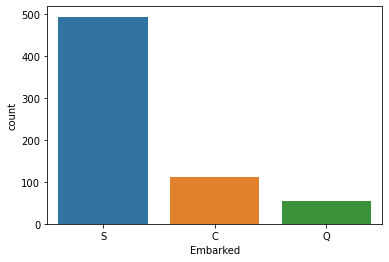

In [20]:
sns.countplot(x=train_df['Embarked'])

# Bivarianvt plots

<AxesSubplot:xlabel='Sex', ylabel='count'>

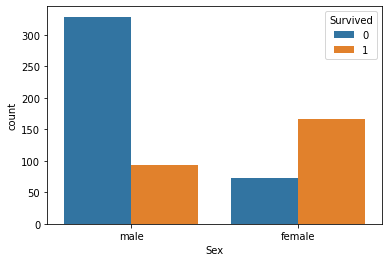

In [22]:
sns.countplot(data=train_df, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

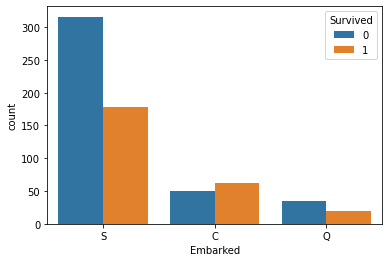

In [23]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')